In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/appliedcode/mthree-c422/refs/heads/main/Exercises/day-5/Decision%20Tree/salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [ ]:
y = df['salary_more_then_100k']
inputs = df.drop(['salary_more_then_100k'], axis =1)
inputs.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = inputs.copy()
X['company'] = le.fit_transform(inputs['company'])
X['job'] = le.fit_transform(inputs['job'])
X['degree'] = le.fit_transform(inputs['degree'])
X.head()

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


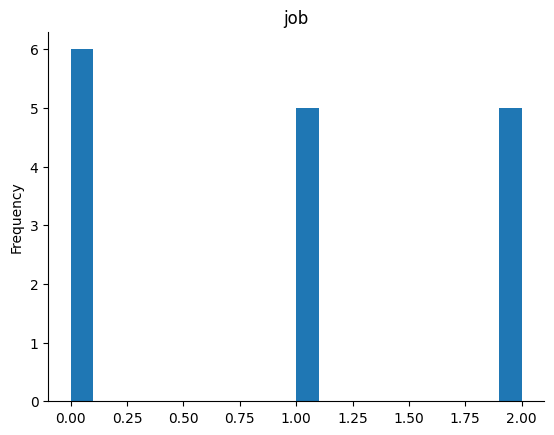

In [ ]:
# @title job

from matplotlib import pyplot as plt
X['job'].plot(kind='hist', bins=20, title='job')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [ ]:
model.score(X, y)

1.0

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(
    'ignore',
    message='X does not have valid feature names',
    category=UserWarning
)
# now no warning
model.predict([[2,0,1]])

array([1])

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/appliedcode/mthree-c422/refs/heads/main/Exercises/day-5/Decision%20Tree/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_1 = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'],axis = 1)
df_1.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [ ]:
df_1['Sex'] = df_1['Sex'].replace({'male':1, 'female':0})
df_1.head()

/tmp/ipython-input-256697150.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1['Sex'] = df_1['Sex'].replace({'male':1, 'female':0})


,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


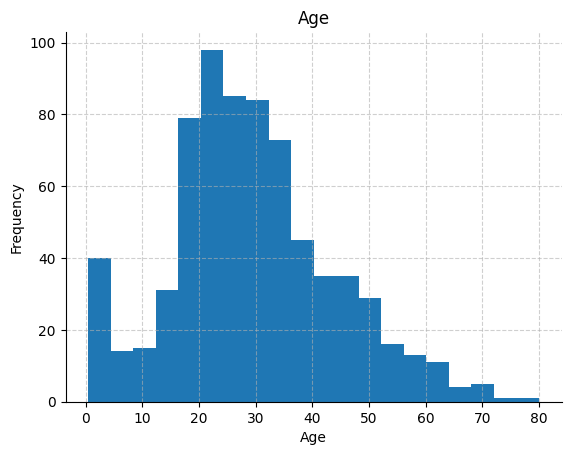

In [ ]:
from matplotlib import pyplot as plt

# Use your actual DataFrame name here instead of _df_3
df['Age'].plot(kind='hist', bins=20, title='Age')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
model.score(X_test, y_test)

0.5

In [ ]:
y = df_1['Survived']
X = df_1.drop(['Survived'], axis=1)
X.head(3)

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250


SVM


In [ ]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
df = pd.DataFrame(digits.data)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
369,0.0,0.0,7.0,12.0,12.0,2.0,0.0,0.0,0.0,5.0,...,2.0,0.0,0.0,0.0,11.0,12.0,13.0,14.0,11.0,0.0
201,0.0,2.0,16.0,16.0,16.0,14.0,5.0,0.0,0.0,9.0,...,0.0,0.0,0.0,4.0,16.0,16.0,8.0,0.0,0.0,0.0
593,0.0,0.0,9.0,15.0,13.0,0.0,0.0,0.0,0.0,5.0,...,5.0,0.0,0.0,0.0,11.0,16.0,16.0,16.0,16.0,3.0
1477,0.0,1.0,11.0,16.0,16.0,4.0,0.0,0.0,0.0,7.0,...,6.0,0.0,0.0,1.0,13.0,16.0,16.0,10.0,0.0,0.0
762,0.0,1.0,8.0,16.0,16.0,3.0,0.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,12.0,16.0,12.0,3.0,0.0,0.0


In [ ]:
df['target'] = digits.target
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
1753,0.0,0.0,1.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,15.0,2.0,0.0,0.0,0.0,7
74,0.0,0.0,13.0,13.0,8.0,2.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,10.0,16.0,16.0,6.0,0.0,0.0,5
1273,0.0,2.0,13.0,16.0,16.0,10.0,0.0,0.0,2.0,15.0,...,1.0,0.0,2.0,15.0,16.0,16.0,12.0,12.0,1.0,2
436,0.0,0.0,11.0,15.0,4.0,0.0,0.0,0.0,0.0,5.0,...,6.0,0.0,0.0,11.0,16.0,10.0,5.0,13.0,6.0,2
850,0.0,2.0,13.0,13.0,11.0,9.0,0.0,0.0,0.0,10.0,...,0.0,0.0,1.0,16.0,15.0,4.0,0.0,0.0,0.0,5


In [ ]:
y = df['target']
X = df.drop(['target'], axis = 1)
X.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
537,0.0,0.0,8.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,...,12.0,4.0,0.0,0.0,7.0,16.0,16.0,16.0,12.0,5.0
834,0.0,0.0,0.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,1.0,14.0,16.0,13.0,1.0,0.0
1573,0.0,0.0,0.0,10.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,10.0,0.0,0.0,0.0
604,0.0,0.0,2.0,13.0,16.0,8.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,3.0,12.0,16.0,11.0,0.0,0.0
813,0.0,0.0,3.0,4.0,10.0,0.0,0.0,0.0,0.0,3.0,...,16.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,16.0,3.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
model.score(X_test, y_test)

0.9944444444444445

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris.target
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
40,5.0,3.5,1.3,0.3,0
21,5.1,3.7,1.5,0.4,0
104,6.5,3.0,5.8,2.2,2
68,6.2,2.2,4.5,1.5,1
3,4.6,3.1,1.5,0.2,0


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df[df['target']==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [ ]:
df['flower_names'] = df.target.apply(lambda x: iris.target_names[x])
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
35,5.0,3.2,1.2,0.2,0,setosa
89,5.5,2.5,4.0,1.3,1,versicolor
102,7.1,3.0,5.9,2.1,2,virginica
112,6.8,3.0,5.5,2.1,2,virginica
41,4.5,2.3,1.3,0.3,0,setosa


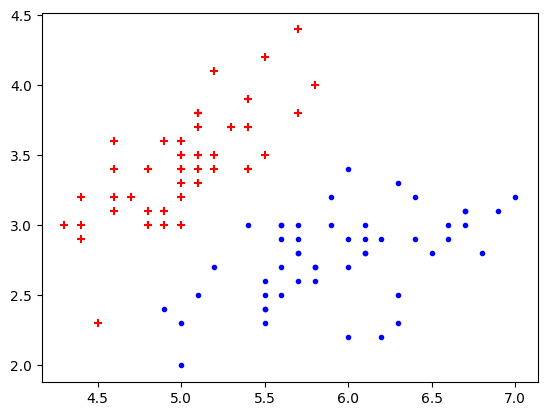

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['sepal length (cm)'][:50], df['sepal width (cm)'][:50], color ='r', marker = '+')
plt.scatter(df['sepal length (cm)'][50:100], df['sepal width (cm)'][50:100], color ='b', marker = '.')

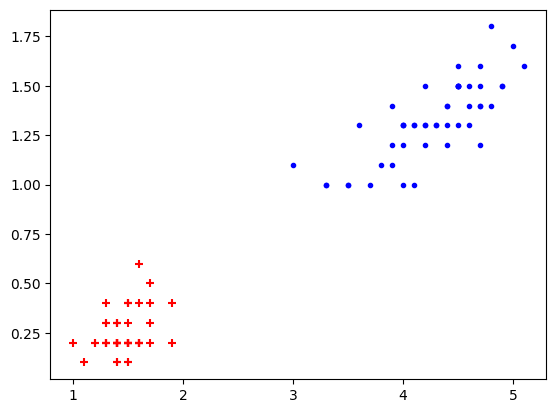

In [ ]:
plt.scatter(df['petal length (cm)'][:50], df['petal width (cm)'][:50], color ='r', marker = '+')
plt.scatter(df['petal length (cm)'][50:100], df['petal width (cm)'][50:100], color ='b', marker = '.')

In [ ]:
y = df.target
X = df.drop(['target', 'flower_names'], axis = 1)
X.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
30,4.8,3.1,1.6,0.2
35,5.0,3.2,1.2,0.2
52,6.9,3.1,4.9,1.5
4,5.0,3.6,1.4,0.2
143,6.8,3.2,5.9,2.3


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
model.score(X_test, y_test)

1.0

Random Forest


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
17,5.1,3.5,1.4,0.3
63,6.1,2.9,4.7,1.4
33,5.5,4.2,1.4,0.2
51,6.4,3.2,4.5,1.5
97,6.2,2.9,4.3,1.3


In [ ]:
X = df.copy()
X.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
2,4.7,3.2,1.3,0.2
9,4.9,3.1,1.5,0.1
7,5.0,3.4,1.5,0.2
25,5.0,3.0,1.6,0.2
101,5.8,2.7,5.1,1.9


In [ ]:
df['target'] = iris.target
y = df['target']
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
46,5.1,3.8,1.6,0.2,0
45,4.8,3.0,1.4,0.3,0
65,6.7,3.1,4.4,1.4,1
18,5.7,3.8,1.7,0.3,0
6,4.6,3.4,1.4,0.3,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
model.score(X_test, y_test)

0.9666666666666667

In [ ]:
model_1 = RandomForestClassifier(n_estimators=40)
model_1.fit(X_train, y_train)
model_1.score(X_test,y_test)

0.9666666666666667

In [ ]:
import pandas as pd
from sklearn.datasets import load_digits

digits = load_digits()
dir(digits)


['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
X = df.copy()

In [ ]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
y = df['target']
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
model.score(X_test, y_test)

0.975

<Axes: >

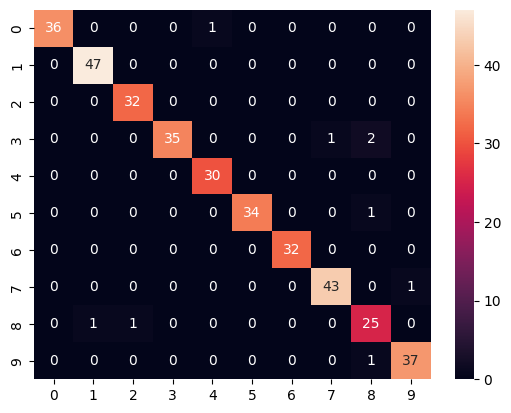

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cm, annot = True)

NaiveBayes

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/appliedcode/mthree-c422/refs/heads/main/Exercises/day-5/Naive%20Bayes/spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


/tmp/ipython-input-4095396473.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='spam', y='Category', inner='box', palette='Dark2')


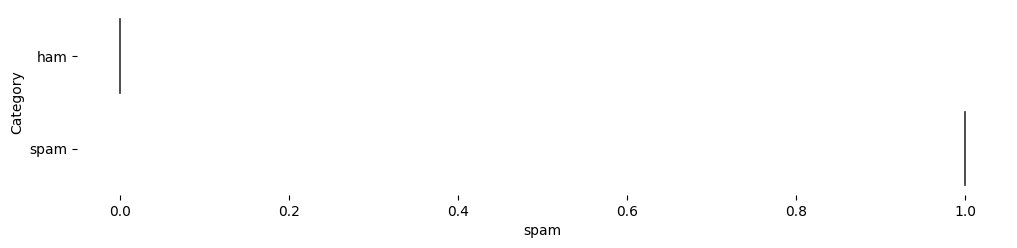

In [ ]:
# @title Category vs spam

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='spam', y='Category', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)


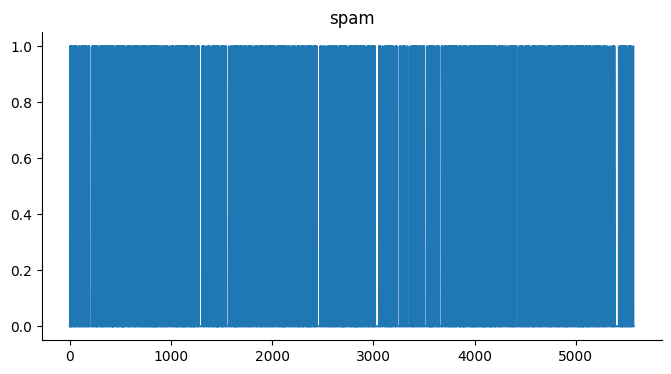

In [ ]:
# @title spam

from matplotlib import pyplot as plt
df['spam'].plot(kind='line', figsize=(8, 4), title='spam')
plt.gca().spines[['top', 'right']].set_visible(False)

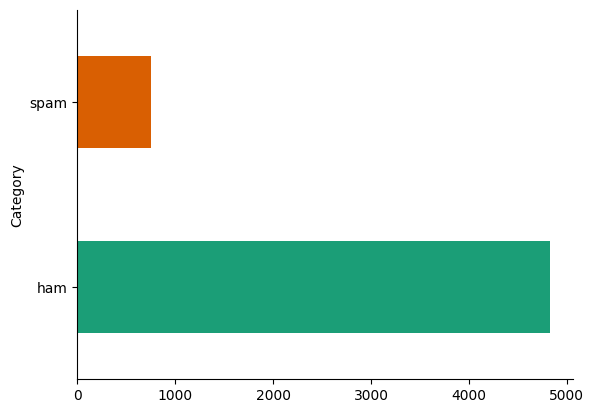

In [ ]:
# @title Category

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['spam'], test_size = 0.2)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_count = cv.fit_transform(X_train)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_count = cv.fit_transform(X_train)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [ ]:
X_test_count = cv.transform(X_test)

In [ ]:
model.score(X_test_count, y_test)

0.9856502242152466

In [ ]:
from sklearn.pipeline import Pipeline
classifier = Pipeline([
    ('vectorizer',cv),
    ('model', model)])
classifier.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('model', MultinomialNB())])

In [ ]:
classifier.score(X_test, y_test)

0.9856502242152466

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/appliedcode/mthree-c422/refs/heads/main/Exercises/day-5/Naive%20Bayes/titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis = 1, inplace =True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [ ]:
df.columns[df.isna().any()]

Index(['Age'], dtype='object')

In [ ]:
df['Age'].head(10)

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0
7,2.0
8,27.0
9,14.0


In [ ]:
df['Age'] = df['Age'].fillna(df.Age.mean())
df.head(10)

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.000000,7.2500,0
1,1,female,38.000000,71.2833,1
2,3,female,26.000000,7.9250,1
3,1,female,35.000000,53.1000,1
4,3,male,35.000000,8.0500,0
5,3,male,29.699118,8.4583,0
6,1,male,54.000000,51.8625,0
7,3,male,2.000000,21.0750,0
8,3,female,27.000000,11.1333,1
9,2,female,14.000000,30.0708,1


In [ ]:
y = df['Survived']
X = df.drop(['Survived'], axis = 1)
X.head(6)

,Pclass,Sex,Age,Fare
0,3,male,22.000000,7.2500
1,1,female,38.000000,71.2833
2,3,female,26.000000,7.9250
3,1,female,35.000000,53.1000
4,3,male,35.000000,8.0500
5,3,male,29.699118,8.4583


In [ ]:
X['Sex'] = X['Sex'].replace({'male':1 , 'female': 0})
X.head()

/tmp/ipython-input-27448662.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Sex'] = X['Sex'].replace({'male':1 , 'female': 0})


,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
model.score(X_test, y_test)

0.7541899441340782

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv = 5)

array([0.74125874, 0.8041958 , 0.80985915, 0.78873239, 0.73943662])

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [ ]:
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df['target'] = wine.target
df.sample(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
84,11.84,0.89,2.58,18.0,94.0,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520.0,1
22,13.71,1.86,2.36,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035.0,0
60,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0,1
150,13.50,3.12,2.62,24.0,123.0,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500.0,2
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0,0
140,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0,2
106,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0,1
57,13.29,1.97,2.68,16.8,102.0,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270.0,0
21,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0,0
16,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280.0,0


In [ ]:
y = df['target']
X = df.drop(['target'], axis = 1)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns = wine.feature_names)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
gnb, mnb = GaussianNB(), MultinomialNB()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
gnb.fit(X_train, y_train)
gnb.score(X_test,y_test)

1.0

In [ ]:
mnb.fit(X_train, y_train)
mnb.score(X_test, y_test)

0.9166666666666666

K Means


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [ ]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df_1 = df.drop(['sepal length (cm)', 'sepal width (cm)'], axis = 1)
df_1.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


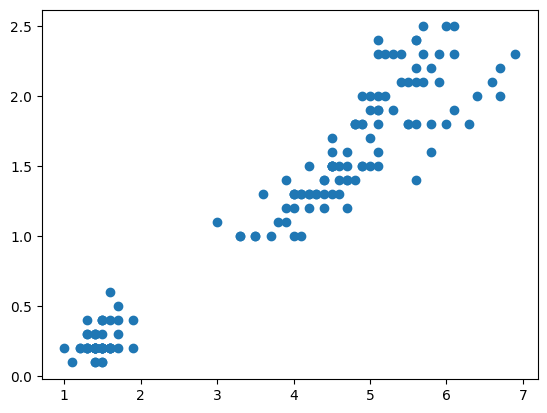

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df_1['petal length (cm)'], df_1['petal width (cm)'] )

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df_1)
    sse.append(km.inertia_)
sse

[550.8953333333333,
 86.39021984551391,
 31.371358974358966,
 20.299607803485397,
 14.193126322751322,
 11.130143401561254,
 9.239914351095127,
 8.09003682755153,
 6.649049078372609]

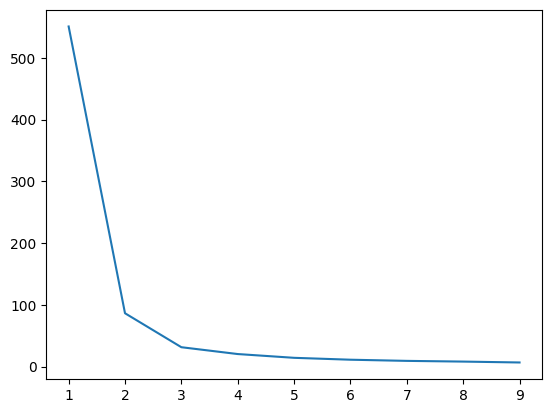

In [ ]:
plt.plot(k_rng, sse)

In [ ]:
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(df_1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
df_1['class'] = y_pred
df_1.head()

,petal length (cm),petal width (cm),class
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


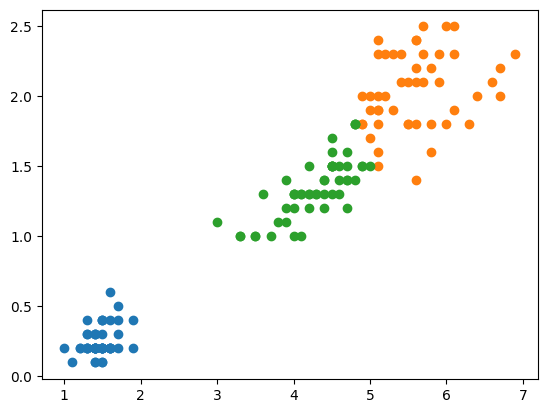

In [ ]:
df_class_0 = df_1[df_1['class']==0]
df_class_1 = df_1[df_1['class']==1]
df_class_2 = df_1[df_1['class']==2]

plt.scatter(df_class_0['petal length (cm)'], df_class_0['petal width (cm)'])
plt.scatter(df_class_1['petal length (cm)'], df_class_1['petal width (cm)'])
plt.scatter(df_class_2['petal length (cm)'], df_class_2['petal width (cm)'])

In [ ]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/appliedcode/mthree-c422/refs/heads/main/Exercises/day-5/KMeans/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


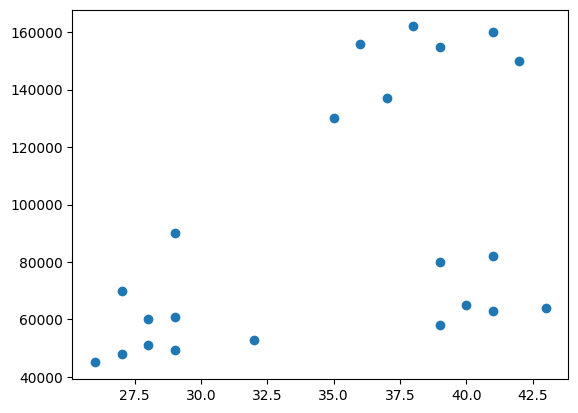

In [ ]:
plt.scatter(df.Age, df['Income($)'])

In [ ]:
cluster = KMeans(n_clusters = 3)
y_pred = cluster.fit_predict(df[['Age', 'Income($)']])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


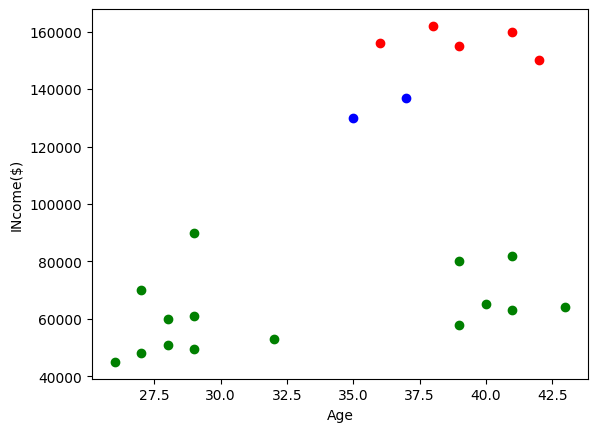

In [ ]:
df_1 = df[df['cluster']==0]
df_2 = df[df['cluster']==1]
df_3 = df[df['cluster']==2]

plt.scatter(df_1['Age'], df_1['Income($)'], color = 'r')
plt.scatter(df_2['Age'], df_2['Income($)'], color = 'g')
plt.scatter(df_3['Age'], df_3['Income($)'], color = 'b')

plt.xlabel('Age')
plt.ylabel('INcome($)')
plt.show()

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,1
1,Michael,29,0.384615,1
2,Mohan,29,0.136752,1
3,Ismail,28,0.128205,1
4,Kory,42,0.897436,0


In [ ]:
scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [ ]:
y_pred = cluster.fit_predict(df[['Age', 'Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [ ]:
cluster.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

Text(0, 0.5, 'Income($)')

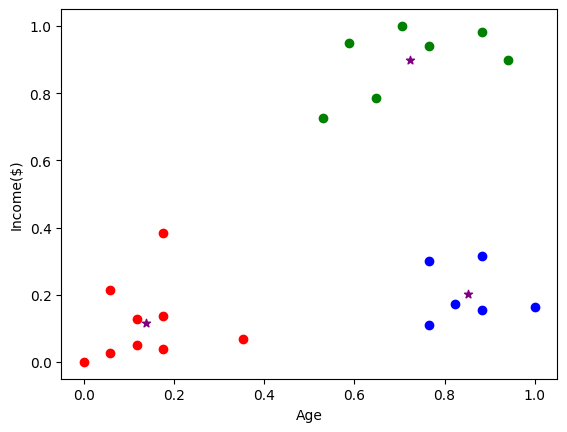

In [ ]:
df_1 = df[df['cluster']==0]
df_2 = df[df['cluster']==1]
df_3 = df[df['cluster']==2]

plt.scatter(df_1['Age'], df_1['Income($)'], color = 'r')
plt.scatter(df_2['Age'], df_2['Income($)'], color = 'g')
plt.scatter(df_3['Age'], df_3['Income($)'], color = 'b')
plt.scatter(cluster.cluster_centers_[:,0], cluster.cluster_centers_[:,1], color = 'purple', marker = '*')

plt.xlabel('Age')
plt.ylabel('Income($)')

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

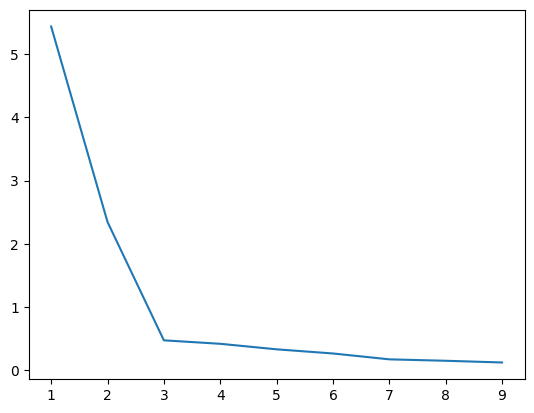

In [ ]:
plt.plot(k_rng, sse)